# Curbing Vehicle Emissions
Greenhouse gasses currently present a very significant threat to our planet and its environment as we know it. The main issue with these gasses, namely CO2, CH4, and N2O, are that they contribute to warming the earth by thickening the earth's atmosphere. Global warming can cause poor public health, wildfires (deforestation), droughts, abnormally heavy rains, rising water levels, and more. The issue of global warming is present in public policy discourse, and it is an issue that needs immediate answers. There are many economic sectors that contribute to rising greenhouse gasses in our atmosphere; for example, industry, transportation, and electricity generation. This project will examine the transporation sector and specifically, vehicles like cars and trucks. This project will utilize the data science life cycle to see how vehicle emissions have changed over the years in the United States, what factors may have caused these changes, and what can be done to minimize greenhouse gasses emitted from tailpipes. Furthermore, another aim of this project is to prove that it is possible to enjoy a healthy environment as well as the luxury of personal vehicles, while using and engineering the latter responsibly.

Source: Greenhouse gases pose threat to public health: <https://www.hsph.harvard.edu/news/features/bernstein-greenhouse-gases-health-threat/>

## Data Collection and Processing

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbee
from bs4 import BeautifulSoup
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

##### EMISSIONS FROM DIFFERENT ECONOMIC SECTORS #####
allEmissions = pd.read_csv("EPA All Sectors.csv")
allEmissions = pd.melt(allEmissions, ["Economic Sector"], var_name="Year", value_name="Emissions")
allEmissions = allEmissions[['Year', 'Economic Sector', 'Emissions']]
display(allEmissions.head(5))

##### EMISSIONS PER YEAR FOR TRANSPORTATION SECTOR #####
transEmissions = pd.read_csv("EPA Transportation.csv")
transEmissions = pd.melt(transEmissions, ["Transportation Sector"], var_name="Year", value_name="Emissions")
transEmissions = transEmissions[['Year', 'Transportation Sector', 'Emissions']]
transEmissions = transEmissions[transEmissions['Transportation Sector'] == 'Total']
transEmissions = transEmissions.drop('Transportation Sector', axis=1)
transEmissions = transEmissions.reset_index(drop=True)
transEmissions['Year'] = transEmissions['Year'].apply(pd.to_numeric)
display(transEmissions.head(5))

##### VARIOUS VEHICLE DATA FOR YEARS #####
vehicles = pd.read_csv('vehiclesdata.csv', na_values=['0', '0.0'], low_memory=False)
vehicles = vehicles[['year', 'comb08', 'co2TailpipeGpm', 'combE', 'cylinders', 'displ', 'phevComb']] # these columns are chosen from the many columns
vehicles = vehicles[vehicles['year'].isin(np.arange(1990, 2021))]
vehicles = vehicles.sort_values('year')
vehicles.columns = ['Year', 'MPG', 'CO2', 'ElectricConsump', 'Cylinders', 'Displacement', 'MPGhybrid']
vehicles = vehicles.reset_index(drop=True)
display(vehicles.head(5))

##### VEHICLE EMISSIONS PER YEAR AND PERCENTAGES OF TOTAL TRANSPORTATION EMISSIONS ##### 
file = open('EPA pdf.html', 'rb')
r = BeautifulSoup(file, "html")
tables = r.findAll("table")
vehiclesPercent = pd.read_html(str(tables))[1]
new_header = vehiclesPercent.iloc[0] # first row will be the header
vehiclesPercent = vehiclesPercent[1:] # first row deleted from dataframe
vehiclesPercent.columns = new_header # set new_header as the df header
vehiclesPercent = vehiclesPercent.drop('Absolute', axis=1)
vehiclesPercent = pd.melt(vehiclesPercent, ['Source', 'Percent'], var_name='Year', value_name='Emissions')
vehiclesPercent = vehiclesPercent[vehiclesPercent['Source'].isin(['On-Road Vehicles6', 'Transportation Total'])]
for index, row in vehiclesPercent.iterrows(): # take the 6 out of on-road vehicles
    if row['Source'] == 'On-Road Vehicles6':
        vehiclesPercent.loc[index, 'Source'] = 'On-Road Vehicles'

for index, row in vehiclesPercent.iterrows(): # recalculates the percent column for accuracy
    if row['Source'] == 'On-Road Vehicles':
        vehiclesPercent.loc[index, 'Percent'] = row['Emissions']/vehiclesPercent.loc[index+15, 'Emissions'] *100

vehiclesPercent = vehiclesPercent[vehiclesPercent['Source'] == 'On-Road Vehicles']
vehiclesPercent = vehiclesPercent.drop('Source', axis=1)
vehiclesPercent = vehiclesPercent[['Year', 'Emissions', 'Percent']]
vehiclesPercent = vehiclesPercent.reset_index(drop=True)
vehiclesPercent['Year'] = vehiclesPercent['Year'].astype(int)
vehiclesPercent['Percent'] = vehiclesPercent['Percent'].apply(pd.to_numeric)
vehiclesPercent['Emissions'] = vehiclesPercent['Emissions'].apply(pd.to_numeric)
display(vehiclesPercent.head(7))

,Year,Economic Sector,Emissions
0,1990,Transportation,1527.076528
1,1990,Electricity generation,1875.537005
2,1990,Industry,1628.555710
3,1990,Agriculture,534.859864
4,1990,Commercial,426.928480


,Year,Emissions
0,1990,1527.076528
1,1991,1480.932414
2,1992,1540.536129
3,1993,1577.522681
4,1994,1632.154313


,Year,MPG,CO2,ElectricConsump,Cylinders,Displacement,MPGhybrid
0,1990,23,386.391304,NaN,4.0,1.6,NaN
1,1990,13,683.615385,NaN,8.0,5.0,NaN
2,1990,14,634.785714,NaN,8.0,5.0,NaN
3,1990,12,740.583333,NaN,8.0,5.8,NaN
4,1990,17,522.764706,NaN,6.0,4.3,NaN


,Year,Emissions,Percent
0,1990,1206.8,79.025604
1,2000,1545.7,81.301283
2,2005,1648.0,83.400810
3,2010,1516.6,84.092043
4,2015,1525.4,84.280899
5,2016,1553.4,83.944880
6,2017,1558.6,83.477050


The above are the dataframes that will be used for the data analysis. In all the tables, the units for "Emissions" are Metric Tons of CO2 Equivalent: Tg CO2 Equivalent.

Table 3 shows data for individual vehicles made by manufacturers. The preview shows no Electric Consumption Data or MPG Hybrid data, as 1990 values are being shown. Data for those columns start appearing in the 2010's.
The units for "MPGHybrid" are: EPA composite gasoline-electricity combined city-highway MPGe for plug-in hybrid vehicles.
The units for "Displacement" are: liters.
The units for "ElectricConsump" are: combined electricity consumption in kw-hrs/100 miles.
The units for "CO2" are: tailpipe CO2 in grams/mile.
MPG stand for Miles Per Gallon.
More data available at: https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

Data for tables 1 and 2 were dowloaded and obtained from https://cfpub.epa.gov/ghgdata/inventoryexplorer/index.html.

Data for table 3 was downloaded and obtained from https://www.fueleconomy.gov/feg/download.shtml.

Data for table 4 was downloaded (as a pdf) and converted into HTML from https://www.epa.gov/sites/production/files/2019-06/documents/420f19047.pdf.

## Visualization

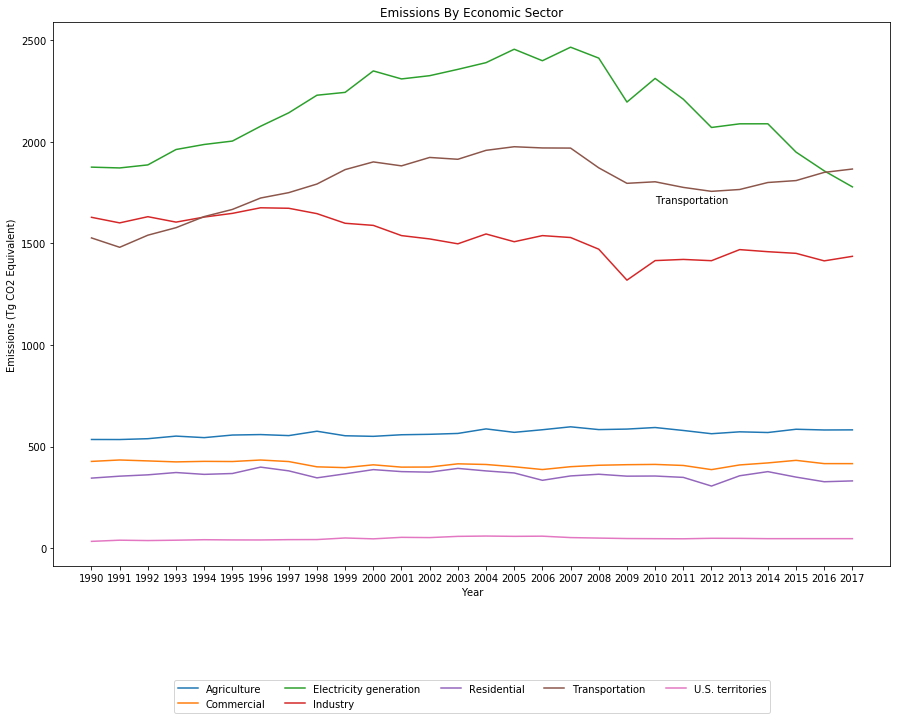

In [2]:
allEmissionsBySector = allEmissions.groupby('Economic Sector')

plt.figure(figsize=(15,10))
plt.xlabel("Year")
plt.ylabel("Emissions (Tg CO2 Equivalent)")
plt.title("Emissions By Economic Sector")

for t in allEmissionsBySector:
    if(t[0] != 'Total'):
        plt.plot(t[1]['Year'], t[1]['Emissions'], label = t[0])
    if(t[0] == 'Transportation'):
        plt.annotate(xy = (20, 1700), s = 'Transportation')
    
plt.legend(loc = 9, bbox_to_anchor=(0.5, -0.2), ncol=5) #puts the legend at the bottom of the plot

Transportation is the brown line and is labeled. It is evident that transportation constitutes a large portion of yearly emissions, and is worthy of being examined. Its spot is second for a vast majority of the time and has been steadily increasing. By 2017, transportation has surpassed electricity generation and becomes the number one source of emissions in the United States. Its examination will be interesting as we can put reason to the fluctuations seen from year to year.  Below, we will process the percentages of emissions that are transportation.

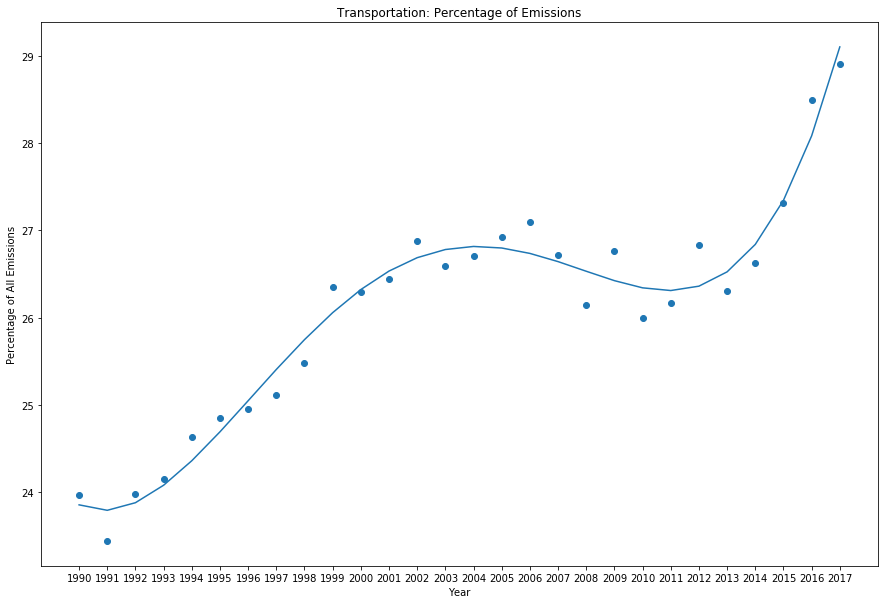

In [3]:
percs = []
for index, row in allEmissionsBySector.get_group('Transportation').iterrows():
    totalRow = allEmissionsBySector.get_group('Total')
    totalEmis = totalRow.loc[totalRow['Year'] == row['Year']]['Emissions'].iloc[0]
    percs.append([row['Year'], (row['Emissions']/totalEmis)*100])

percTable = pd.DataFrame(percs)
percTable.columns = ['Year', 'Percentage']
percTable['Year'] = percTable['Year'].apply(pd.to_numeric)

plt.figure(figsize=(15,10))
plt.title("Transportation: Percentage of Emissions")
plt.xlabel("Year")
plt.ylabel("Percentage of All Emissions")
plt.scatter(percTable['Year'], percTable['Percentage'])
plt.xticks(np.arange(min(percTable['Year']), max(percTable['Year'])+1, 1.0))
fit4 = np.polyfit(percTable['Year'], percTable['Percentage'], 4) # puts a tick for every year value on the x axis
plt.plot(percTable['Year'], np.poly1d(fit4)(percTable['Year']))
plt.show()

The percentages of transportation vs. year are plotted with a polynomial degree 4 trend for visuals. We can further see the importance of transportation emissions here as the percentages for emissions are steadily increasing. From 1990 to 2017 the percentage has gone from about 24% to about 29%. 

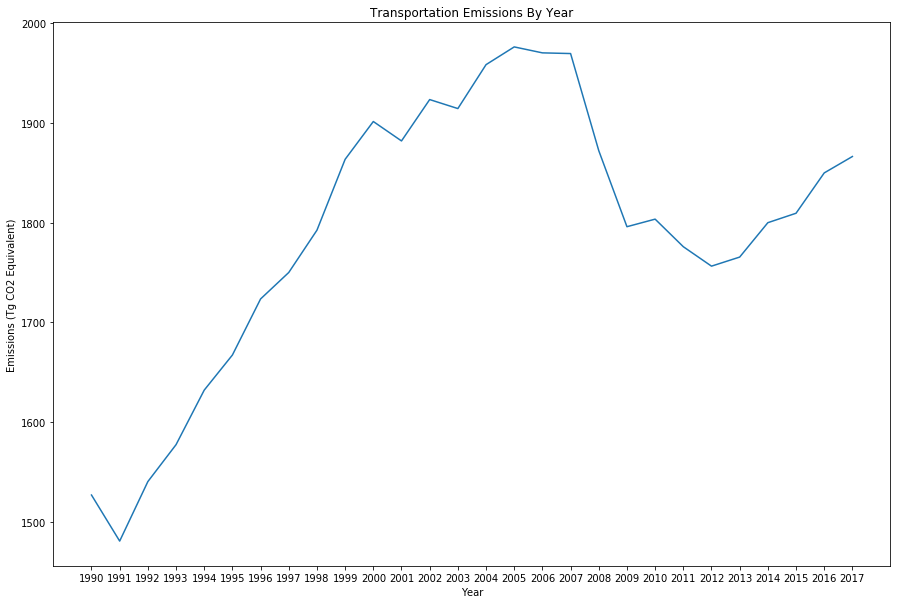

In [4]:
plt.figure(figsize=(15,10))
plt.title('Transportation Emissions By Year')
plt.xlabel('Year')
plt.ylabel('Emissions (Tg CO2 Equivalent)')

plt.plot(transEmissions['Year'], transEmissions['Emissions'])
plt.xticks(np.arange(min(transEmissions['Year']), max(transEmissions['Year'])+1, 1.0))
plt.show()

There have been a lot of fluctuations in the transportation emissions thoughout the years. There was a sharp increase from 1991 to 2000 and more erratic increasing and decreasing until 2005. In 2007, transportation emissions start decreasing dramatically until about 2009. Then there is a slight increase. It will be increasing to see what has caused these inflection points. Below, we will look at specific vehicle data throughout the years to see what has happened.

## Attempted Machine Learning

Linear Model RMS: 49.43166765739498
Polynomial Model Degree 2 RMS: 87.50558466183752
Polynomial Model Degree 3 RMS: 95.73998680828903
Polynomial Model Degree 4 RMS: 95.67481888373692


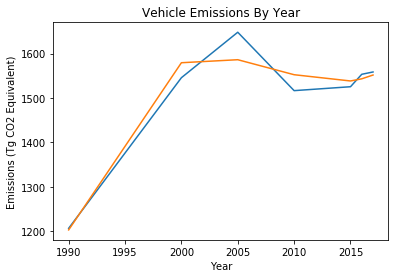

Linear Model RMS: 1.0905724367332221
Polynomial Model Degree 2 RMS: 3.531925394128589
Polynomial Model Degree 3 RMS: 7.039937082678821


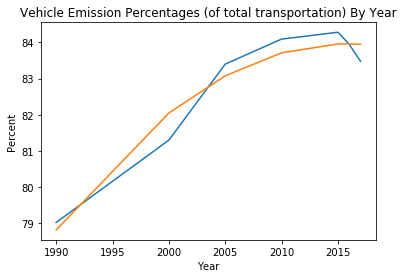

In [5]:
train_data, test_data = train_test_split(vehiclesPercent, train_size=0.8)

##### LINEAR MODEL #####
# Train the model
lm = LinearRegression()
lm.fit(train_data[['Year']], train_data['Emissions'])

# Predict on the test data
y_test = test_data['Emissions']
y_pred = lm.predict(test_data[['Year']])

# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Model RMS: " + str(rms))


##### POLYNOMIAL DEGREE 2 #####

# Train the model
Xsub = train_data['Year']
X = np.expand_dims(Xsub, axis=1)
y = train_data['Emissions']
poly = PolynomialFeatures(degree=2)
ft = poly.fit_transform(X)
ftpred = poly.fit_transform(test_data[['Year']])

clf = LinearRegression()
clf.fit(ft, y)
y_pred = clf.predict(ftpred)

rms = np.sqrt(mean_squared_error(test_data['Emissions'], y_pred))

print("Polynomial Model Degree 2 RMS: " + str(rms))

##### POLYNOMIAL DEGREE 3 #####

# Train the model
Xsub = train_data['Year']
X = np.expand_dims(Xsub, axis=1)
y = train_data['Emissions']
poly = PolynomialFeatures(degree=3)
ft = poly.fit_transform(X)
ftpred = poly.fit_transform(test_data[['Year']])

clf = LinearRegression()
clf.fit(ft, y)
y_pred = clf.predict(ftpred)

# plt.plot(test_data['Year'], y_pred)

rms = np.sqrt(mean_squared_error(test_data['Emissions'], y_pred))

print("Polynomial Model Degree 3 RMS: " + str(rms))

##### POLYNOMIAL DEGREE 4 #####

# Train the model
Xsub = train_data['Year']
X = np.expand_dims(Xsub, axis=1)
y = train_data['Emissions']
poly = PolynomialFeatures(degree=4)
ft = poly.fit_transform(X)
ftpred = poly.fit_transform(test_data[['Year']])

clf = LinearRegression()
clf.fit(ft, y)
y_pred = clf.predict(ftpred)

rms = np.sqrt(mean_squared_error(test_data['Emissions'], y_pred))

print("Polynomial Model Degree 4 RMS: " + str(rms))

plt.title('Vehicle Emissions By Year')
plt.xlabel('Year')
plt.ylabel('Emissions (Tg CO2 Equivalent)')
plt.plot(vehiclesPercent['Year'], vehiclesPercent['Emissions'])
fit3 = np.polyfit(vehiclesPercent['Year'], vehiclesPercent['Emissions'], 3)
plt.plot(vehiclesPercent['Year'], np.poly1d(fit3)(vehiclesPercent['Year']))
plt.show()


train_data, test_data = train_test_split(vehiclesPercent, train_size=0.8)

##### LINEAR MODEL #####
# Train the model
lm = LinearRegression()
lm.fit(train_data[['Year']], train_data['Percent'])

# Predict on the test data
y_test = test_data['Percent']
y_pred = lm.predict(test_data[['Year']])

# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Model RMS: " + str(rms))


##### POLYNOMIAL DEGREE 2 #####

# Train the model
Xsub = train_data['Year']
X = np.expand_dims(Xsub, axis=1)
y = train_data['Percent']
poly = PolynomialFeatures(degree=2)
ft = poly.fit_transform(X)
ftpred = poly.fit_transform(test_data[['Year']])

clf = LinearRegression()
clf.fit(ft, y)
y_pred = clf.predict(ftpred)

rms = np.sqrt(mean_squared_error(test_data['Percent'], y_pred))

print("Polynomial Model Degree 2 RMS: " + str(rms))

##### POLYNOMIAL DEGREE 3 #####

# Train the model
Xsub = train_data['Year']
X = np.expand_dims(Xsub, axis=1)
y = train_data['Percent']
poly = PolynomialFeatures(degree=3)
ft = poly.fit_transform(X)
ftpred = poly.fit_transform(test_data[['Year']])

clf = LinearRegression()
clf.fit(ft, y)
y_pred = clf.predict(ftpred)

rms = np.sqrt(mean_squared_error(test_data['Percent'], y_pred))

print("Polynomial Model Degree 3 RMS: " + str(rms))


plt.title('Vehicle Emission Percentages (of total transportation) By Year')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.plot(vehiclesPercent['Year'], vehiclesPercent['Percent'])
fit2 = np.polyfit(vehiclesPercent['Year'], vehiclesPercent['Percent'], 2)
plt.plot(vehiclesPercent['Year'], np.poly1d(fit2)(vehiclesPercent['Year']))
plt.show()

Machine learning was attempted on the dataset containing vehicle emission averages per year. In the model, year was chosen as the predictor to try to try to predict and model the emission numbers. This is problematic for one main reason. Year by itself is not a logical predictor for emission numbers. Year is just a number, a label for a point in time, and has no bearing on the emissions.

In the first plot above, vehicle emissions were plotted against the year with a polynomial degree 3 fit for visuals.
In the second plot, vehicle emission percentages (of total transportation emissions) are plotted against year. It is evident that vehicle emissions have been steadily rising and consituting a greater percentage of transportation emissions.

In [6]:
import statsmodels.formula.api as smf

ols = smf.ols(formula="Emissions ~ Year", data=vehiclesPercent).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     4.289
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0931
Time:                        23:57:34   Log-Likelihood:                -41.791
No. Observations:                   7   AIC:                             87.58
Df Residuals:                       5   BIC:                             87.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.762e+04   9236.817     -1.908      0.115   -4.14e+04    6123.480
Year           9.5281      4.601      2.071      0.093      -2.299      21.355
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.532
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.540
Skew:                           0.532   Prob(JB):                        0.763
Kurtosis:                       2.150   Cond. No.                     4.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As stated above, year is not a good predictor. The p value of year interaction is greater than 0.05 (0.093). Below, we will perform multivariate regression to using CO2 emitted from car tailpipes, MPG's, cylinders, and displacent to predict emissions.

In [7]:
import math #this module is imported to check whether a cell value in the dataframe is NaN

# in this section, I create a new dataframe based on the vehicle data and the yearly vehicle emissions data
vehiclesEmissions = pd.DataFrame(np.nan, np.arange(1990,2021), ['VehicleEmissions', 'MPG', 'CO2', 'ElectricConsump', 'Cylinders', 'Displacement', 'MPGhybrid'])
for v in vehicles.groupby('Year'):
    means = v[1].mean()
    means.pop('Year')
    for key, value in means.items():
        vehiclesEmissions.loc[v[0], key] = value
for index, row in vehiclesPercent.iterrows():
    vehiclesEmissions.loc[int(row['Year']), 'VehicleEmissions'] = transEmissions[transEmissions['Year'] == int(row['Year'])]['Emissions'].values[0] * (row['Percent']/100)

MLTable = vehiclesEmissions[vehiclesEmissions['VehicleEmissions'].notnull()]
display(MLTable)

# perform multivariate linear regression
X = MLTable[['MPG', 'CO2', 'Cylinders', 'Displacement']]
Y = MLTable['VehicleEmissions']

lin = LinearRegression()
lin.fit(X, Y)

print('Intercept: \n', lin.intercept_)
print('Coefficients: \n', lin.coef_)

# with the regression model, fill in the values that don't yet exist
for index, row in vehiclesEmissions.iterrows():
    if (math.isnan(row['VehicleEmissions']) and index < 2018) or index > 2017:
        vehiclesEmissions.loc[index, 'VehicleEmissions'] = lin.predict([[row['MPG'], row['CO2'], row['Cylinders'], row['Displacement']]])
    
display(vehiclesEmissions.head(5))

,VehicleEmissions,MPG,CO2,ElectricConsump,Cylinders,Displacement,MPGhybrid
1990,1206.781451,19.000928,499.800704,NaN,5.496289,3.217440,NaN
2000,1545.726958,19.526190,482.456799,51.250000,5.740431,3.215789,NaN
2005,1647.969871,19.193825,486.015500,NaN,5.944254,3.399485,NaN
2010,1516.547208,20.588819,454.795094,NaN,5.965735,3.502525,NaN
2015,1524.930196,24.038971,410.538340,36.676767,5.715415,3.250751,44.583333
2016,1552.759846,25.150555,401.752234,38.680629,5.601137,3.131357,44.777778
2017,1557.834742,25.249033,401.803642,38.069135,5.579572,3.097941,46.947368


Intercept: 
 -9506.093517082893
Coefficients: 
 [  118.78480831     6.68456361  1602.22549467 -1147.35279746]


,VehicleEmissions,MPG,CO2,ElectricConsump,Cylinders,Displacement,MPGhybrid
1990,1206.781451,19.000928,499.800704,NaN,5.496289,3.217440,NaN
1991,1323.479970,18.825972,504.270073,NaN,5.598940,3.266873,NaN
1992,1342.934549,18.862623,502.228115,NaN,5.623550,3.276182,NaN
1993,1320.865879,19.104300,494.837784,NaN,5.602928,3.248582,NaN
1994,1376.188676,19.012220,494.883790,NaN,5.704684,3.333198,NaN


Multivariate linear regression was performed on the first Dataframe. The MPG, CO2, Cylinders, and Displacement columns were used as predictors to model the vehicle emissions. This model was then used the predict missing emission values (years from 1990 to 2000 that are not in the first table). The second table (with just the first 5 rows being shown) is the result. There is one glaring problem with this approach: there are 7 predictor observations per variable (since the vehicle emissions data is only avialable from the EPA for the 7 years shown). A validation and testing data set is not able to be formed and the whole dataset is being used as training. Below is the graphical result of the predicted values.

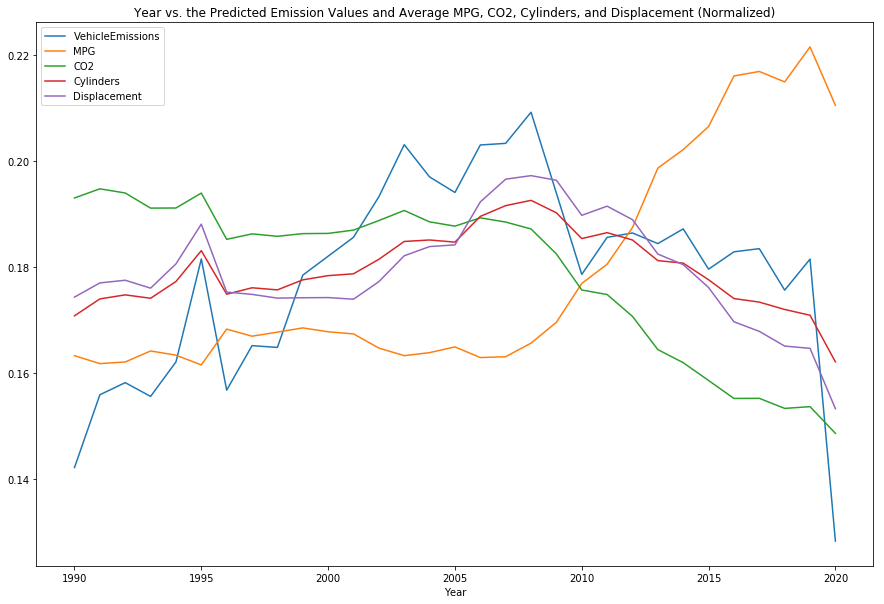

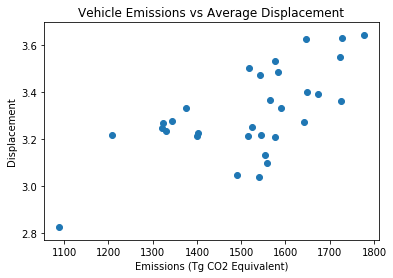

In [8]:
plt.figure(figsize=(15,10))
plt.title('Year vs. the Predicted Emission Values and Average MPG, CO2, Cylinders, and Displacement (Normalized)')
plt.xlabel('Year')
plt.plot(vehiclesEmissions['VehicleEmissions']/np.linalg.norm(vehiclesEmissions['VehicleEmissions']))
plt.plot(vehiclesEmissions['MPG']/np.linalg.norm(vehiclesEmissions['MPG']))
plt.plot(vehiclesEmissions['CO2']/np.linalg.norm(vehiclesEmissions['CO2']))
plt.plot(vehiclesEmissions['Cylinders']/np.linalg.norm(vehiclesEmissions['Cylinders']))
plt.plot(vehiclesEmissions['Displacement']/np.linalg.norm(vehiclesEmissions['Displacement']))

plt.legend()
plt.show()

plt.title('Vehicle Emissions vs Average Displacement')
plt.xlabel('Emissions (Tg CO2 Equivalent)')
plt.ylabel('Displacement')
plt.scatter(vehiclesEmissions['VehicleEmissions'], vehiclesEmissions['Displacement'])
plt.show()

Above, the predicted values are visualized. In the first table, the y axis is normalized. We can see that CO2, cylinders, and displacement change proportionally to total vehicle emissions. MPG reacts in the oppsite way, which makes sense because the higher the emissions, the lower the miles travelled per gallon. The second table shows the relationship between Displacement and Emissions. These visualizations are interesting, and below we will examine the interaction.

In [9]:
import statsmodels.formula.api as smf

ols = smf.ols(formula="VehicleEmissions ~ Cylinders : Displacement : CO2 : MPG", data=vehiclesEmissions).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       VehicleEmissions   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     49.02
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.07e-07
Time:                        23:57:35   Log-Likelihood:                -185.37
No. Observations:                  31   AIC:                             374.7
Df Residuals:                      29   BIC:                             377.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         10.0769    215.978      0.047      0.963    -431.648     451.802
Cylinders:Displacement:CO2:MPG     0.0083      0.001      7.001      0.000       0.006       0.011
==============================================================================
Omnibus:                        5.563   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                1.853
Skew:                           0.035   Prob(JB):                        0.396
Kurtosis:                       1.804   Cond. No.                     2.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As is evident from the Ordinary Least Squares calculation, there there is a low p-value ( < 0.001). The p-value for the intercept is very high, which is expected because MPG is part of the interaction and has an "opposite" sign slope compared to the emissions as well as the other interaction terms. This causes the value to be skewed. Tise analysis is interesting, but due to lack of data and testing, it's not possible to say whether this model is overfitted or not. The remainder of the project will focus on how MPG, cylinders, and displacment on individual cars affects the CO2 (grams/mile) on individual cars.

## Successful Machine Learning

In [17]:
# ElectricConsump, MPGhybrid columns will be dropped as they are no longer useful for the remainder of the analysis
vehiclesData = vehicles.drop('ElectricConsump', axis=1)
vehiclesData = vehiclesData.drop('MPGhybrid', axis=1)

vehiclesData = vehiclesData.dropna() # rows with NaN values will be dropped as they will not be needed

# split into training, validation, and test data
train_data, test_data = train_test_split(vehiclesData, train_size=0.6)

X = train_data[['MPG', 'Cylinders', 'Displacement']] # predictors
Y = train_data['CO2'] # value to model/predict

##### lINEAR MODEL #####
lin = LinearRegression()
lin.fit(X, Y)

pred = lin.predict(test_data[['MPG', 'Cylinders', 'Displacement']])
rmslin = np.sqrt(mean_squared_error(test_data['CO2'], pred))
print("Linear Model RMS: " + str(rmslin))

##### Polynomials #####
for i in np.arange(2, 9):
    poly = PolynomialFeatures(degree=i)
    ft = poly.fit_transform(X)
    ftpred = poly.fit_transform(test_data[['MPG', 'Cylinders', 'Displacement']])

    lr = LinearRegression()
    lr.fit(ft, Y)
    pred = lr.predict(ftpred)

    rmspoly = np.sqrt(mean_squared_error(test_data['CO2'], pred))
    print("Polynomial Degree " + str(i) + " Model RMS: " + str(rmspoly))

Linear Model RMS: 37.497075733702346
Polynomial Degree 2 Model RMS: 17.36799948301908
Polynomial Degree 3 Model RMS: 14.669210401445023
Polynomial Degree 4 Model RMS: 13.857102963453437
Polynomial Degree 5 Model RMS: 13.62323709035319
Polynomial Degree 6 Model RMS: 13.349628251409886
Polynomial Degree 7 Model RMS: 13.903517871792317
Polynomial Degree 8 Model RMS: 19.730075322161753


In the code above, multivariate regression is performed with MPG, Cylinders, and Displacement as the predictors with a linear model and polynomial degrees 2 through 8. The models are trained on a 60% training data data set and tested with a 40% test data set. Values were randomly chosen for these data sets. The RMS values were calculated using the test data set. It is clear that polynomial degree 6 has the lowest root mean squared value. While this may seem overfitted, the whole dataset is about 30,000 rows. There was plenty of data to train with. Next, we will visualize the accuracy of the polynomial degree 6 model.

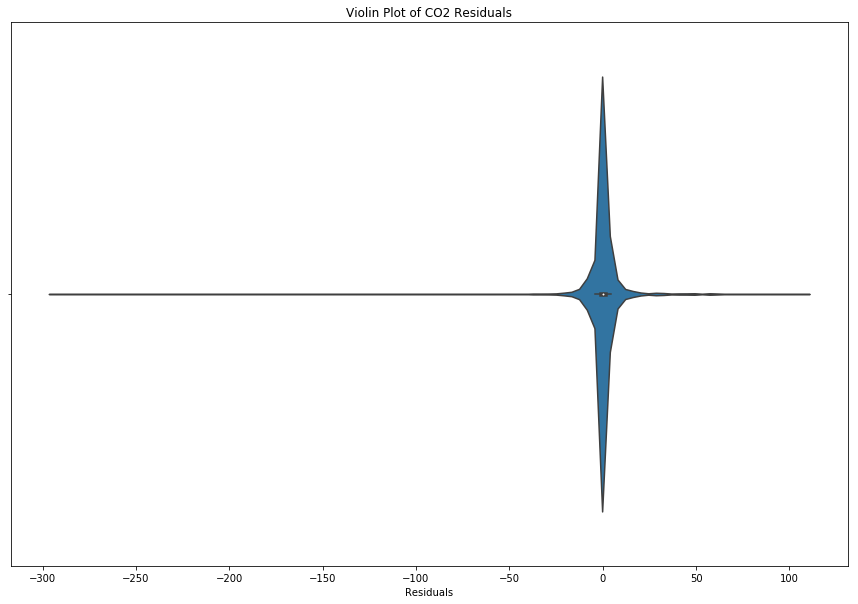

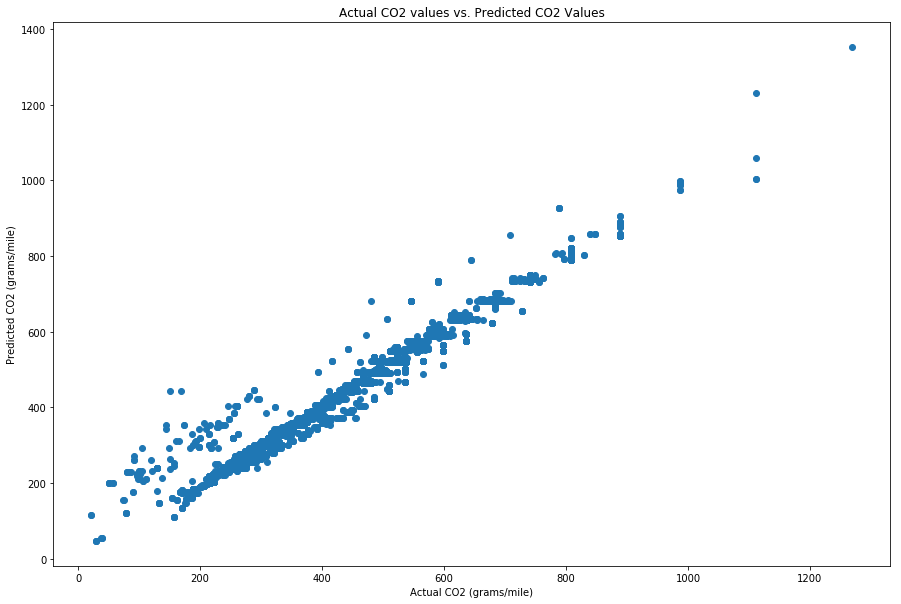

In [11]:
# polynomial degree 6 is retrained on the full data set
poly = PolynomialFeatures(degree=6)
ft = poly.fit_transform(X)
ftpred = poly.fit_transform(vehiclesData[['MPG', 'Cylinders', 'Displacement']])

lr = LinearRegression()
lr.fit(ft, Y)
pred = lr.predict(ftpred)

vehiclesData['Residuals'] = vehiclesData['CO2'] - pred

import seaborn as sb #seaborn is imported to make violin plot

# a violin plot for residuals
plt.figure(figsize=(15,10))
sb.violinplot(vehiclesData['Residuals'])
plt.title("Violin Plot of CO2 Residuals")
plt.xlabel("Residuals")
plt.show()

# a plot of actual vs predicted CO2 values
plt.figure(figsize=(15,10))
plt.scatter(vehiclesData['CO2'], pred)
plt.title("Actual CO2 values vs. Predicted CO2 Values")
plt.xlabel("Actual CO2 (grams/mile)")
plt.ylabel("Predicted CO2 (grams/mile)")
plt.show()

Above, we visualize the polynomial degree 6 model. In the code, a model was created with the full dataset and predicted with the predictors from the full dataset. The first plot shows a violin plot of the residuals. The plot is unimodel. The values are very close to 0, showing that this is a good model. In the latter plot, the actual vs predicted values themselves were plotted, further showcasing the model. The scatter plot is very linear - the values match up very closely. Next, we see the interaction of MPG, Cylinders, and Displacement with CO2.

In [12]:
ols = smf.ols(formula="CO2 ~ MPG : Cylinders : Displacement", data=vehicles).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                 1.811e+04
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:57:37   Log-Likelihood:            -1.9377e+05
No. Observations:               32651   AIC:                         3.875e+05
Df Residuals:                   32649   BIC:                         3.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    331.2008      1.098    301.663      0.000     329.049     333.353
MPG:Cylinders:Displacement     0.3429      0.003    134.584      0.000       0.338       0.348
==============================================================================
Omnibus:                     2351.347   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5488.888
Skew:                           0.453   Prob(JB):                         0.00
Kurtosis:                       4.793   Cond. No.                         935.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interaction of MPG, Cylinders, and Displacement with CO2 is clearly shows that the null hypothesis is rejected. As is expected, MPG, Cylinders, and Displacent have signifant impact on the CO2 grams/mile emitted from the tailpipe of cars. The p value of the interation is very much less than 0.05. The R squared value is 0.357.

## Conclusion
We have now seen how transportation, and specifically, vehicles, have an effect on the environment. At the beginning of the analysis, we took a broad view of the emissions: by economic sector. Transportation went from being the leading cause of emissions to being the most, recently. Transportation itself constitutes numerous modes: cars, airplanes, trains, etc... We then visualized how transportation emissions have been rising, and in particular, how its percentage of total emissions in the United States has been rising. We then attempted to do machine learning to predict vehicle emissions per year using average dislacement, cylinders, MPG, and CO2 as predictors. This unfortunately did not work out as the were not enough rows for the predictors due to lack of data. These steps were retained in this report as they were part of this data science life cycle. After this, the anaylsis took a different direction and mulitvariate regression was performed with MPG, cylinders, and displacement on individual cars being used to predict CO2 on individual cars. This regression was successful as there was over 30,000 data points. A polynomial degree 6 was used, and it was shown that MPG, cylinders, and displacement have a significant impact on CO2 emitted from tailpipes. With this knowledge, and the rising percentage of vehicles and transportation in total US emissions, buyers and car manufacturers need to be more responsible. Cars with smaller engines (including turbochargers), less cylinders, and engineered more efficiently (MPG) need to be made. As buyers, we need to purchase cars that we believe to be environomentally friendly. Let's keep the Earth healthy together.

Further questions not covered in this report:
How have electric and hybrid cars affected emissions in recent years?
Which car manufacturers produce the most environmentally friendly vehicles and why?

Further reading: https://www.ucsusa.org/clean-vehicles/car-emissions-and-global-warming